In [1]:
## This Python notebook implements the linear regression from scratch for multivariate (multi features)
## using gradient descent method
## Credit : Machine Learning course (assignment #1) from Prof Andrew Ng (free course on Coursera/Stanford)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# load data from csv file 
data=np.genfromtxt('ex1data2.txt', delimiter=',')
# Two features
X=data[:,0:2]

# Target feature 
y=data[:,2:3]

# count of examples (number of houses)
m=len(y)

## for debug
print(X.shape)

(47, 2)


In [3]:
## print 10 records
a=X[0:9,:]
b=y[0:9,:]
c=np.concatenate((a,b),axis=1)
print(c)

[[2.10400e+03 3.00000e+00 3.99900e+05]
 [1.60000e+03 3.00000e+00 3.29900e+05]
 [2.40000e+03 3.00000e+00 3.69000e+05]
 [1.41600e+03 2.00000e+00 2.32000e+05]
 [3.00000e+03 4.00000e+00 5.39900e+05]
 [1.98500e+03 4.00000e+00 2.99900e+05]
 [1.53400e+03 3.00000e+00 3.14900e+05]
 [1.42700e+03 3.00000e+00 1.98999e+05]
 [1.38000e+03 3.00000e+00 2.12000e+05]]


In [4]:
print (X[0:9,:])

[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]
 [1.985e+03 4.000e+00]
 [1.534e+03 3.000e+00]
 [1.427e+03 3.000e+00]
 [1.380e+03 3.000e+00]]


In [5]:
# features normalise
X_norm = np.copy(X)  # make a copy of values
#X_norm = X  # this is a reference / address
mu = np.zeros(np.size(X[0,:]))
sigma = np.zeros(np.size(X[0,:]))

def featureNormalize(X_norm, mu, sigma):
  global X
  num_features = np.size(X[0,:])
  for i in range(num_features):
        mu[i]    =  np.mean(X[:,i])
        sigma[i] =  np.std(X[:,i])
        X_norm[:,i] = (X[:,i] - mu[i]) / sigma[i] 
       
print (X[0:9,:])

[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]
 [1.985e+03 4.000e+00]
 [1.534e+03 3.000e+00]
 [1.427e+03 3.000e+00]
 [1.380e+03 3.000e+00]]


In [6]:
featureNormalize(X_norm, mu, sigma)
# Expected std
# Feature #1 794.7023535 Feature #2 0.760981887
print (sigma)

# Expected Average
# Feature #1 2000.680851  Feature #2 3.170212766
print (mu)


[7.86202619e+02 7.52842809e-01]
[2000.68085106    3.17021277]


In [7]:
ones=np.ones(m).reshape(m,1)
X_train = (np.append(ones, X_norm, axis=1))
# Append the first columns of 1 in X matrix (artificial feature for the intercept)
X_train.shape
print (X_train[0:9,:])  # normalised values for training with gradient descent

[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]
 [ 1.         -0.01994505  1.10220517]
 [ 1.         -0.59358852 -0.22609337]
 [ 1.         -0.72968575 -0.22609337]
 [ 1.         -0.78946678 -0.22609337]]


In [8]:
# Choose some alpha value
# Some gradient descent settings
alpha = 0.02
num_iters = 400
J_history = np.zeros(num_iters).reshape(num_iters,1)

In [9]:
theta = np.zeros(3).reshape(3,1)
# initialise the parameters (two for univariate linear regression) a*x + b = y
# theta[0] is b : intercept
# theta[1] is  slope1
# theta[2] is  slope2

# Init Theta and Run Gradient Descent 
#theta = zeros(3, 1);
#[theta, J_history] = gradientDescentMulti(X_train, y, theta, alpha, num_iters);

In [10]:
def computeCostMulti(X_train,y,theta):
  #COMPUTECOST Compute cost for linear regression
  #   J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
  #   parameter for linear regression to fit the data points in X and y

  # Initialize some useful values
  m = len(y)
  # You need to return the following variables correctly 
  J = 0;
  # ====================== YOUR CODE HERE ======================
  # Instructions: Compute the cost of a particular choice of theta
  #               You should set J to the cost.

  #In math : predictions =  X_train * theta
  predictions =  np.matmul(X_train,theta)
  square_err = np.power((predictions - y),2)
  J = 1/(2*m)* np.sum(square_err)
  # least square method : square the difference to take the absolute value
  return J

# =========================================================================

#J_history = np.zeros(1500).reshape(1500,1)
# for debug
print(theta)

[[0.]
 [0.]
 [0.]]


In [11]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
#GRADIENTDESCENTMULTI Performs gradient descent to learn theta
#   theta = GRADIENTDESCENTMULTI(x, y, theta, alpha, num_iters) updates theta by
#   taking num_iters gradient steps with learning rate alpha
  global J_history
# Initialize some useful values
  m = len(y)
# number of training examples
  J_history = np.zeros(num_iters).reshape(num_iters, 1)
  for iter in range(num_iters):
    predictions = np.matmul(X,theta)
    updates = np.matmul(X.T,(predictions - y))
    theta = theta - alpha * (1/m) * updates
    J_history[iter]=computeCostMulti(X, y, theta)
  return(theta)

In [12]:
J=computeCostMulti(X_train, y, theta)

In [13]:
print(J)
print(theta)
## cost with the null parameters (defauted null values in initialisation of theta variable)

65591548106.45744
[[0.]
 [0.]
 [0.]]


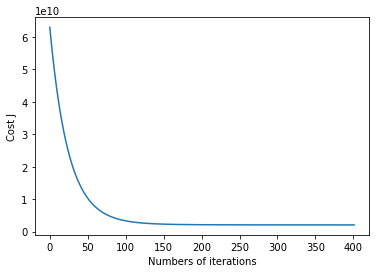

In [14]:
theta = gradientDescentMulti(X_train, y, theta, alpha, num_iters)
x_vals = np.linspace(0,num_iters+1,num_iters)
#min_y = J_history.min()
#max_y = J_history.max()
#plt.axis([0,400,min_y, max_y])
plt.plot(x_vals,J_history,'-')
plt.xlabel("Numbers of iterations")
plt.ylabel("Cost J")
plt.show()
#print(J_history)

In [15]:
print(theta)
# the values match with polyfit (moreless)
#expected values
# 340307.357730
# 108788.316675
# -4807.166967

[[340307.35772969]
 [107757.47433209]
 [ -4888.35338493]]


In [16]:
JJ=computeCostMulti(X_train, y, theta)
print("Least cost:"+repr(JJ))
# check the least cost - debug

Least cost:2044542613.2133398


In [17]:
# Estimate the price of a 1650 sq-ft, 3 br house
price = 0; # You should change this
element = np.array([1,(1650 - mu[0])/sigma[0],(3 - mu[1])/sigma[1]])
price = np.matmul(element, theta)

print('Predicted price of a 1650 sq-ft, 3 br house using gradient descent ' + repr(price[0]))
# expect value  $293377.233014

Predicted price of a 1650 sq-ft, 3 br house using gradient descent 293348.0221781551


In [18]:
def normalEqn(X, y):
#NORMALEQN Computes the closed-form solution to linear regression 
#  NORMALEQN(X,y) computes the closed-form solution to linear 
#   regression using the normal equations.    
  global theta
  theta = np.zeros(3).reshape(3,1)
  XT0 = np.matmul(X.T,X)
  XT1 = np.matmul(X.T,y)
  Inv_M = np.linalg.pinv(XT0)
  theta = np.matmul(Inv_M,XT1)
  #theta = np.matmul(np.linalg.pinv(np.matmul(X.T,X)), (np.matmul(X.T,y)))
  return (theta)
   # Math formula : theta = pinv(X' * X) * X' * y

In [19]:
# Estimate the price of a 1650 sq-ft, 3 br house
price = 0; # You should change this
element = np.array([1,1650,3])
price = np.matmul(element, theta)

print('Predicted price of a 1650 sq-ft, 3 br house using gradient descent ' + repr(price[0]))
# expect value  $293081.464335

Predicted price of a 1650 sq-ft, 3 br house using gradient descent 178125474.9455257
